In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
# Define the exact solution u = H
def exact_solution_h(x, y, t):
    return -torch.sin(x)*torch.sin(y)*torch.cos(t)

def initial_condition_h(x, y):
    return -torch.sin(x)*torch.sin(y) 

In [3]:
# Define the exact solution p = E
def exact_solution_e1(x, y, t):
    return -torch.sin(x)*torch.sin(t)*torch.cos(y)

def initial_condition_e1(x, y):
    return 0.0*torch.sin(x) 

In [4]:
# Define the exact solution p = E
def exact_solution_e2(x, y, t):
    return torch.sin(y)*torch.sin(t)*torch.cos(x)

def initial_condition_e2(x, y):
    return 0.0*torch.sin(x) 

In [5]:
n_data = 5000
n_var = 3
data_inp1 = torch.zeros((n_data, n_var))
data_inp1[:, 0] = 0.2
data_inp1[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp1[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp2 = torch.zeros((n_data, n_var))
data_inp2[:, 0] = 0.4
data_inp2[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp2[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp3 = torch.zeros((n_data, n_var))
data_inp3[:, 0] = 0.6
data_inp3[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp3[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp4 = torch.zeros((n_data, n_var))
data_inp4[:, 0] = 0.8
data_inp4[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp4[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp5 = torch.zeros((n_data, n_var))
data_inp5[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp5[:, 1] = 0.2
data_inp5[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp6 = torch.zeros((n_data, n_var))
data_inp6[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp6[:, 1] = 0.4
data_inp6[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp7 = torch.zeros((n_data, n_var))
data_inp7[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp7[:, 1] = 0.6
data_inp7[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp8 = torch.zeros((n_data, n_var))
data_inp8[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp8[:, 1] = 0.8
data_inp8[:, 2] = torch.rand((n_data,1)).reshape(-1,)

In [6]:
h_data1 = exact_solution_h(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2])
h_data1 = h_data1.reshape(-1,1)

h_data2 = exact_solution_h(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2])
h_data2 = h_data2.reshape(-1,1)

h_data3 = exact_solution_h(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2])
h_data3 = h_data3.reshape(-1,1)

h_data4 = exact_solution_h(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2])
h_data4 = h_data4.reshape(-1,1)

h_data5 = exact_solution_h(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2])
h_data5 = h_data5.reshape(-1,1)

h_data6 = exact_solution_h(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2])
h_data6 = h_data6.reshape(-1,1)

h_data7 = exact_solution_h(data_inp7[:, 0], data_inp7[:, 1], data_inp7[:, 2])
h_data7 = h_data7.reshape(-1,1)

h_data8 = exact_solution_h(data_inp8[:, 0], data_inp8[:, 1], data_inp8[:, 2])
h_data8 = h_data8.reshape(-1,1)

In [7]:
# assigning number of points
initial_pts = 200 
left_boundary_pts = 200 
right_boundary_pts = 200
back_boundary_pts = 200
front_boundary_pts = 200
residual_pts = 1000

In [8]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

x_init = torch.rand((initial_pts,1)) # initial pts
y_init = torch.rand((initial_pts,1))
t_init =  0*x_init
init =  torch.cat([x_init, y_init, t_init],1)
h_init = initial_condition_h(init[:,0], init[:, 1]).reshape(-1, 1)
e1_init = initial_condition_e1(init[:,0], init[:, 1]).reshape(-1, 1)
e2_init = initial_condition_e2(init[:,0], init[:, 1]).reshape(-1, 1)
w_init = torch.cat([h_init, e1_init, e2_init],1)


xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
yb_left = torch.rand((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, yb_left, tb_left ],1)
h_b_l = exact_solution_h(xb_left, yb_left, tb_left).reshape(-1, 1)
e1_b_l = exact_solution_e1(xb_left, yb_left, tb_left).reshape(-1, 1)
e2_b_l = exact_solution_e2(xb_left, yb_left, tb_left).reshape(-1, 1)



xb_right = torch.ones((right_boundary_pts, 1)) # right spatial boundary
yb_right = torch.rand((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, yb_right, tb_right ],1)
h_b_r = exact_solution_h(xb_right, yb_right, tb_right).reshape(-1, 1)
e1_b_r = exact_solution_e1(xb_right, yb_right, tb_right).reshape(-1, 1)
e2_b_r = exact_solution_e2(xb_right, yb_right, tb_right).reshape(-1, 1)



xb_front = torch.rand((front_boundary_pts, 1)) # front spatial boundary
yb_front = torch.zeros((front_boundary_pts, 1)) # front spatial boundary
tb_front = torch.rand((front_boundary_pts, 1)) # 
b_front = torch.cat([xb_front, yb_front, tb_front ],1)
h_b_f = exact_solution_h(xb_front, yb_front, tb_front).reshape(-1, 1)
e1_b_f = exact_solution_e1(xb_front, yb_front, tb_front).reshape(-1, 1)
e2_b_f = exact_solution_e2(xb_front, yb_front, tb_front).reshape(-1, 1)



xb_back = torch.rand((back_boundary_pts, 1)) # back spatial boundary
yb_back = torch.ones((back_boundary_pts, 1)) # back spatial boundary
tb_back = torch.rand((back_boundary_pts, 1)) # back boundary pts
b_back = torch.cat([xb_back, yb_back, tb_back ],1)
h_b_b = exact_solution_h(xb_back, yb_back, tb_back).reshape(-1, 1)
e1_b_b = exact_solution_e1(xb_back, yb_back, tb_back).reshape(-1, 1)
e2_b_b = exact_solution_e2(xb_back, yb_back, tb_back).reshape(-1, 1)



x_interior = torch.rand((residual_pts, 1))
y_interior = torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, y_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, b_left,  b_right, b_front, b_back), batch_size=200, shuffle=False)

In [9]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [10]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = w_init.shape[1]+2, n_hidden_layers=4, neurons=20)


In [11]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

In [12]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [13]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, bd_left,  bd_right, bd_front, bd_back) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                h_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                e1_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                e2_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_h_ini = torch.autograd.grad(h_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h_initial_t = grad_h_ini[:, 2]
                
                grad_e1_ini = torch.autograd.grad(e1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e1_initial_t = grad_e1_ini[:, 2]
                
                grad_e2_ini = torch.autograd.grad(e2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e2_initial_t = grad_e2_ini[:, 2]
                
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                h_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                e1_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                e2_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                h_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                e1_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                e2_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                
                # for front boundary
                w_bd_front_pred_ = model(bd_front)
                h_bd_front_pred_ = w_bd_front_pred_[:,0].reshape(-1,1)
                e1_bd_front_pred_ = w_bd_front_pred_[:,1].reshape(-1,1)
                e2_bd_front_pred_ = w_bd_front_pred_[:,2].reshape(-1,1)
                
                # for back boundary
                w_bd_back_pred_ = model(bd_back)
                h_bd_back_pred_ = w_bd_back_pred_[:,0].reshape(-1,1)
                e1_bd_back_pred_ = w_bd_back_pred_[:,1].reshape(-1,1)
                e2_bd_back_pred_ = w_bd_back_pred_[:,2].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                h_hat = w_hat[:,0].reshape(-1,1)
                e1_hat = w_hat[:,1].reshape(-1,1)
                e2_hat = w_hat[:,2].reshape(-1,1)
                func1 = w_hat[:, 3].reshape(-1,1)
                func2 = w_hat[:, 4].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                
                grad_h_hat = torch.autograd.grad(h_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h_x = grad_h_hat[:, 0].reshape(-1,1)
                h_y = grad_h_hat[:, 1].reshape(-1,1)
                
                grad_e1_hat = torch.autograd.grad(e1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e1_x = grad_e1_hat[:, 0].reshape(-1,1)
                e1_y = grad_e1_hat[:, 1].reshape(-1,1)
                
                grad_e2_hat = torch.autograd.grad(e2_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e2_x = grad_e2_hat[:, 0].reshape(-1,1)
                e2_y = grad_e2_hat[:, 1].reshape(-1,1)
                
                h_t = grad_h_hat[:, 2].reshape(-1,1)
                e1_t = grad_e1_hat[:, 2].reshape(-1,1)
                e2_t = grad_e2_hat[:, 2].reshape(-1,1)
                
                output_data_pred1_ = model(data_inp1)
                h_data_pred1_ = output_data_pred1_[:, 0]
                
                output_data_pred2_ = model(data_inp2)
                h_data_pred2_ = output_data_pred2_[:, 0]
                
                output_data_pred3_ = model(data_inp3)
                h_data_pred3_ = output_data_pred3_[:, 0]
                
                output_data_pred4_ = model(data_inp4)
                h_data_pred4_ = output_data_pred4_[:, 0]
                
                output_data_pred5_ = model(data_inp5)
                h_data_pred5_ = output_data_pred5_[:, 0]
                
                output_data_pred6_ = model(data_inp6)
                h_data_pred6_ = output_data_pred6_[:, 0]
                
                output_data_pred7_ = model(data_inp7)
                h_data_pred7_ = output_data_pred7_[:, 0]
                
                output_data_pred8_ = model(data_inp8)
                h_data_pred8_ = output_data_pred8_[:, 0]
                
                
                # Item 1. below
                loss1 = torch.mean((h_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + 0.1*torch.mean((2*h_t.reshape(-1, ) + e2_x.reshape(-1, ) - e1_y.reshape(-1, ))**p)+torch.mean((h_bd_left_pred_.reshape(-1,)- h_b_l.reshape(-1,))**p) + torch.mean((h_bd_right_pred_.reshape(-1,)- h_b_r.reshape(-1,))**p) +torch.mean((h_bd_front_pred_.reshape(-1,)- h_b_f.reshape(-1,))**p) + torch.mean((h_bd_back_pred_.reshape(-1,)- h_b_b.reshape(-1,))**p)
                loss2 = torch.mean((e1_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ 0.1*torch.mean((4*e1_t.reshape(-1, ) + 2*e2_t.reshape(-1, ) - h_y.reshape(-1, ) + func1.reshape(-1, ) )**p) +torch.mean((e1_bd_left_pred_.reshape(-1,)- e1_b_l.reshape(-1,))**p) + torch.mean((e1_bd_right_pred_.reshape(-1,)- e1_b_r.reshape(-1,))**p) +torch.mean((e1_bd_front_pred_.reshape(-1,)- e1_b_f.reshape(-1,))**p) + torch.mean((e1_bd_back_pred_.reshape(-1,)- e1_b_b.reshape(-1,))**p)
                loss3 = torch.mean((e2_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p)+ 0.1*torch.mean((2*e1_t.reshape(-1, ) + e2_t.reshape(-1, )  + h_x.reshape(-1, ) + func1.reshape(-1, ))**p) +torch.mean((e2_bd_left_pred_.reshape(-1,)- e2_b_l.reshape(-1,))**p) + torch.mean((e2_bd_right_pred_.reshape(-1,)- e2_b_r.reshape(-1,))**p) +torch.mean((e2_bd_front_pred_.reshape(-1,)- e2_b_f.reshape(-1,))**p) + torch.mean((e2_bd_back_pred_.reshape(-1,)- e2_b_b.reshape(-1,))**p)
                data = torch.mean((h_data_pred1_.reshape(-1, ) - h_data1.reshape(-1, ))**p) + torch.mean((h_data_pred2_.reshape(-1, ) - h_data2.reshape(-1, ))**p)  + torch.mean((h_data_pred5_.reshape(-1, ) - h_data5.reshape(-1, ))**p) + torch.mean((h_data_pred6_.reshape(-1, ) - h_data6.reshape(-1, ))**p) 
                loss = loss1 + loss2 + loss3 + data
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [14]:
n_epochs = 2500
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  30.10940170288086
################################  1  ################################
Loss:  29.59170913696289
################################  2  ################################
Loss:  24.914762496948242
################################  3  ################################
Loss:  19.787006378173828
################################  4  ################################
Loss:  15.10310173034668
################################  5  ################################
Loss:  11.626723289489746
################################  6  ################################
Loss:  9.22502613067627
################################  7  ################################
Loss:  7.5065598487854
################################  8  ################################
Loss:  6.226987361907959
################################  9  ################################
Loss:  5.255314350128174
################################  10  ############

Loss:  0.02749086543917656
################################  92  ################################
Loss:  0.02713812328875065
################################  93  ################################
Loss:  0.026787711307406425
################################  94  ################################
Loss:  0.026450006291270256
################################  95  ################################
Loss:  0.02611434832215309
################################  96  ################################
Loss:  0.02578773722052574
################################  97  ################################
Loss:  0.02546699345111847
################################  98  ################################
Loss:  0.02515305206179619
################################  99  ################################
Loss:  0.024843530729413033
################################  100  ################################
Loss:  0.024541601538658142
################################  101  ################################
Loss:  0.02424

Loss:  0.013661915436387062
################################  182  ################################
Loss:  0.013626747764647007
################################  183  ################################
Loss:  0.013592648319900036
################################  184  ################################
Loss:  0.013560513034462929
################################  185  ################################
Loss:  0.013529538176953793
################################  186  ################################
Loss:  0.013499733991920948
################################  187  ################################
Loss:  0.0134695740416646
################################  188  ################################
Loss:  0.013441571965813637
################################  189  ################################
Loss:  0.013416560366749763
################################  190  ################################
Loss:  0.013392284512519836
################################  191  ################################
Lo

Loss:  0.011911900714039803
################################  271  ################################
Loss:  0.011899092234671116
################################  272  ################################
Loss:  0.011885887943208218
################################  273  ################################
Loss:  0.011873253621160984
################################  274  ################################
Loss:  0.011860747821629047
################################  275  ################################
Loss:  0.011849051341414452
################################  276  ################################
Loss:  0.011837609112262726
################################  277  ################################
Loss:  0.011826702393591404
################################  278  ################################
Loss:  0.011815960519015789
################################  279  ################################
Loss:  0.011805673129856586
################################  280  ################################


Loss:  0.011130502447485924
################################  358  ################################
Loss:  0.01112691406160593
################################  359  ################################
Loss:  0.011123456992208958
################################  360  ################################
Loss:  0.011120334267616272
################################  361  ################################
Loss:  0.011117413640022278
################################  362  ################################
Loss:  0.011114654131233692
################################  363  ################################
Loss:  0.011112038977444172
################################  364  ################################
Loss:  0.011109443381428719
################################  365  ################################
Loss:  0.011106937192380428
################################  366  ################################
Loss:  0.01110448595136404
################################  367  ################################
Lo

Loss:  0.010797233320772648
################################  446  ################################
Loss:  0.010794548317790031
################################  447  ################################
Loss:  0.010791795328259468
################################  448  ################################
Loss:  0.010788838379085064
################################  449  ################################
Loss:  0.010785866528749466
################################  450  ################################
Loss:  0.010782412253320217
################################  451  ################################
Loss:  0.010779195465147495
################################  452  ################################
Loss:  0.010776575654745102
################################  453  ################################
Loss:  0.010773798450827599
################################  454  ################################
Loss:  0.010770831257104874
################################  455  ################################


Loss:  0.010597312822937965
################################  532  ################################
Loss:  0.010595518164336681
################################  533  ################################
Loss:  0.010593648068606853
################################  534  ################################
Loss:  0.010591760277748108
################################  535  ################################
Loss:  0.010589880868792534
################################  536  ################################
Loss:  0.010588026605546474
################################  537  ################################
Loss:  0.010586237534880638
################################  538  ################################
Loss:  0.010584443807601929
################################  539  ################################
Loss:  0.010582607239484787
################################  540  ################################
Loss:  0.010580751113593578
################################  541  ################################


Loss:  0.010387071408331394
################################  618  ################################
Loss:  0.010384890250861645
################################  619  ################################
Loss:  0.010382804088294506
################################  620  ################################
Loss:  0.010380737483501434
################################  621  ################################
Loss:  0.010378655046224594
################################  622  ################################
Loss:  0.010376526042819023
################################  623  ################################
Loss:  0.010374421253800392
################################  624  ################################
Loss:  0.010372279211878777
################################  625  ################################
Loss:  0.010370297357439995
################################  626  ################################
Loss:  0.01036844402551651
################################  627  ################################
L

Loss:  0.0102062514051795
################################  702  ################################
Loss:  0.010203615762293339
################################  703  ################################
Loss:  0.01020092610269785
################################  704  ################################
Loss:  0.010198084637522697
################################  705  ################################
Loss:  0.010195231065154076
################################  706  ################################
Loss:  0.010192777961492538
################################  707  ################################
Loss:  0.010189956985414028
################################  708  ################################
Loss:  0.010187546722590923
################################  709  ################################
Loss:  0.010184316895902157
################################  710  ################################
Loss:  0.010181178338825703
################################  711  ################################
Los

Loss:  0.009992006234824657
################################  787  ################################
Loss:  0.009990387596189976
################################  788  ################################
Loss:  0.009988637641072273
################################  789  ################################
Loss:  0.00998681876808405
################################  790  ################################
Loss:  0.009984531439840794
################################  791  ################################
Loss:  0.009981323033571243
################################  792  ################################
Loss:  0.009978076443076134
################################  793  ################################
Loss:  0.009974955581128597
################################  794  ################################
Loss:  0.009971776977181435
################################  795  ################################
Loss:  0.009968429803848267
################################  796  ################################
L

Loss:  0.009755201637744904
################################  872  ################################
Loss:  0.009753013961017132
################################  873  ################################
Loss:  0.009750669822096825
################################  874  ################################
Loss:  0.009748533368110657
################################  875  ################################
Loss:  0.009746372699737549
################################  876  ################################
Loss:  0.009744030423462391
################################  877  ################################
Loss:  0.009741677902638912
################################  878  ################################
Loss:  0.009739617817103863
################################  879  ################################
Loss:  0.009737498126924038
################################  880  ################################
Loss:  0.009735380299389362
################################  881  ################################


Loss:  0.009544912725687027
################################  957  ################################
Loss:  0.009542357176542282
################################  958  ################################
Loss:  0.009539552964270115
################################  959  ################################
Loss:  0.009534737095236778
################################  960  ################################
Loss:  0.009532742202281952
################################  961  ################################
Loss:  0.009530654177069664
################################  962  ################################
Loss:  0.009528479538857937
################################  963  ################################
Loss:  0.009526180103421211
################################  964  ################################
Loss:  0.009523799642920494
################################  965  ################################
Loss:  0.0095213046297431
################################  966  ################################
Lo

Loss:  0.009312889538705349
################################  1047  ################################
Loss:  0.009309710934758186
################################  1048  ################################
Loss:  0.009306510910391808
################################  1049  ################################
Loss:  0.009303581900894642
################################  1050  ################################
Loss:  0.00930080283433199
################################  1051  ################################
Loss:  0.009298175573348999
################################  1052  ################################
Loss:  0.009295690804719925
################################  1053  ################################
Loss:  0.00929335504770279
################################  1054  ################################
Loss:  0.009291150607168674
################################  1055  ################################
Loss:  0.009289072826504707
################################  1056  #########################

Loss:  0.009086616337299347
################################  1135  ################################
Loss:  0.00908501073718071
################################  1136  ################################
Loss:  0.009083347395062447
################################  1137  ################################
Loss:  0.009081613272428513
################################  1138  ################################
Loss:  0.009079737588763237
################################  1139  ################################
Loss:  0.009077750146389008
################################  1140  ################################
Loss:  0.009075570851564407
################################  1141  ################################
Loss:  0.00907316617667675
################################  1142  ################################
Loss:  0.009070859290659428
################################  1143  ################################
Loss:  0.0090685049071908
################################  1144  ###########################

Loss:  0.008914227597415447
################################  1222  ################################
Loss:  0.008913080208003521
################################  1223  ################################
Loss:  0.008911981247365475
################################  1224  ################################
Loss:  0.008910908363759518
################################  1225  ################################
Loss:  0.008909821510314941
################################  1226  ################################
Loss:  0.008908772841095924
################################  1227  ################################
Loss:  0.008907673880457878
################################  1228  ################################
Loss:  0.008906594477593899
################################  1229  ################################
Loss:  0.008905439637601376
################################  1230  ################################
Loss:  0.008904224261641502
################################  1231  #######################

Loss:  0.008813988417387009
################################  1312  ################################
Loss:  0.008813181892037392
################################  1313  ################################
Loss:  0.008812250569462776
################################  1314  ################################
Loss:  0.008811505511403084
################################  1315  ################################
Loss:  0.008810686878859997
################################  1316  ################################
Loss:  0.008809960447251797
################################  1317  ################################
Loss:  0.008809110149741173
################################  1318  ################################
Loss:  0.008808214217424393
################################  1319  ################################
Loss:  0.008807241916656494
################################  1320  ################################
Loss:  0.008805973455309868
################################  1321  #######################

Loss:  0.008731658570468426
################################  1399  ################################
Loss:  0.008731058798730373
################################  1400  ################################
Loss:  0.008730479516088963
################################  1401  ################################
Loss:  0.008729872293770313
################################  1402  ################################
Loss:  0.008729271590709686
################################  1403  ################################
Loss:  0.008728623390197754
################################  1404  ################################
Loss:  0.008727961219847202
################################  1405  ################################
Loss:  0.008727270178496838
################################  1406  ################################
Loss:  0.008726600557565689
################################  1407  ################################
Loss:  0.008725888095796108
################################  1408  #######################

Loss:  0.00864001177251339
################################  1488  ################################
Loss:  0.008638624101877213
################################  1489  ################################
Loss:  0.00863722525537014
################################  1490  ################################
Loss:  0.008635963313281536
################################  1491  ################################
Loss:  0.008634751662611961
################################  1492  ################################
Loss:  0.008633575402200222
################################  1493  ################################
Loss:  0.008632414042949677
################################  1494  ################################
Loss:  0.008631275966763496
################################  1495  ################################
Loss:  0.008630149997770786
################################  1496  ################################
Loss:  0.008629092946648598
################################  1497  #########################

Loss:  0.00853759329766035
################################  1576  ################################
Loss:  0.008535207249224186
################################  1577  ################################
Loss:  0.008533015847206116
################################  1578  ################################
Loss:  0.008530666120350361
################################  1579  ################################
Loss:  0.008527648635208607
################################  1580  ################################
Loss:  0.00852547399699688
################################  1581  ################################
Loss:  0.008523204363882542
################################  1582  ################################
Loss:  0.008520694449543953
################################  1583  ################################
Loss:  0.008518361486494541
################################  1584  ################################
Loss:  0.008515923283994198
################################  1585  #########################

Loss:  0.008427259512245655
################################  1661  ################################
Loss:  0.00842556543648243
################################  1662  ################################
Loss:  0.008423934690654278
################################  1663  ################################
Loss:  0.00842227041721344
################################  1664  ################################
Loss:  0.008420851081609726
################################  1665  ################################
Loss:  0.008419428952038288
################################  1666  ################################
Loss:  0.008418040350079536
################################  1667  ################################
Loss:  0.008416661992669106
################################  1668  ################################
Loss:  0.008415254764258862
################################  1669  ################################
Loss:  0.00841405801475048
################################  1670  ##########################

Loss:  0.008321395143866539
################################  1746  ################################
Loss:  0.00831943191587925
################################  1747  ################################
Loss:  0.008317602798342705
################################  1748  ################################
Loss:  0.008315789513289928
################################  1749  ################################
Loss:  0.008313785307109356
################################  1750  ################################
Loss:  0.008311857469379902
################################  1751  ################################
Loss:  0.008310054428875446
################################  1752  ################################
Loss:  0.008308256976306438
################################  1753  ################################
Loss:  0.008306619711220264
################################  1754  ################################
Loss:  0.008305031806230545
################################  1755  ########################

Loss:  0.008213377557694912
################################  1831  ################################
Loss:  0.008212143555283546
################################  1832  ################################
Loss:  0.008210835978388786
################################  1833  ################################
Loss:  0.008209483698010445
################################  1834  ################################
Loss:  0.008208248764276505
################################  1835  ################################
Loss:  0.008207022212445736
################################  1836  ################################
Loss:  0.008205936290323734
################################  1837  ################################
Loss:  0.008204896003007889
################################  1838  ################################
Loss:  0.008203853853046894
################################  1839  ################################
Loss:  0.008202848955988884
################################  1840  #######################

Loss:  0.00813403632491827
################################  1919  ################################
Loss:  0.008132991380989552
################################  1920  ################################
Loss:  0.008132043294608593
################################  1921  ################################
Loss:  0.008131146430969238
################################  1922  ################################
Loss:  0.008130218833684921
################################  1923  ################################
Loss:  0.008129381574690342
################################  1924  ################################
Loss:  0.008128518238663673
################################  1925  ################################
Loss:  0.008127732202410698
################################  1926  ################################
Loss:  0.008126878179609776
################################  1927  ################################
Loss:  0.00812594871968031
################################  1928  #########################

Loss:  0.008046350441873074
################################  2009  ################################
Loss:  0.00804536510258913
################################  2010  ################################
Loss:  0.008044324815273285
################################  2011  ################################
Loss:  0.00804307870566845
################################  2012  ################################
Loss:  0.008041752502322197
################################  2013  ################################
Loss:  0.008040450513362885
################################  2014  ################################
Loss:  0.008039052598178387
################################  2015  ################################
Loss:  0.008037758059799671
################################  2016  ################################
Loss:  0.008036425337195396
################################  2017  ################################
Loss:  0.00803489051759243
################################  2018  ##########################

Loss:  0.007967798039317131
################################  2098  ################################
Loss:  0.00796722061932087
################################  2099  ################################
Loss:  0.007966632954776287
################################  2100  ################################
Loss:  0.007966049946844578
################################  2101  ################################
Loss:  0.007965434342622757
################################  2102  ################################
Loss:  0.00796479918062687
################################  2103  ################################
Loss:  0.007964150980114937
################################  2104  ################################
Loss:  0.007963492535054684
################################  2105  ################################
Loss:  0.007962810806930065
################################  2106  ################################
Loss:  0.007962002418935299
################################  2107  #########################

Loss:  0.007898381911218166
################################  2188  ################################
Loss:  0.00789772067219019
################################  2189  ################################
Loss:  0.007897126488387585
################################  2190  ################################
Loss:  0.00789653416723013
################################  2191  ################################
Loss:  0.007895948365330696
################################  2192  ################################
Loss:  0.007895375601947308
################################  2193  ################################
Loss:  0.007894790731370449
################################  2194  ################################
Loss:  0.007894225418567657
################################  2195  ################################
Loss:  0.007893686182796955
################################  2196  ################################
Loss:  0.00789317861199379
################################  2197  ##########################

Loss:  0.007841705344617367
################################  2274  ################################
Loss:  0.007840914651751518
################################  2275  ################################
Loss:  0.007840105332434177
################################  2276  ################################
Loss:  0.007839338853955269
################################  2277  ################################
Loss:  0.007838549092411995
################################  2278  ################################
Loss:  0.00783775094896555
################################  2279  ################################
Loss:  0.007836824283003807
################################  2280  ################################
Loss:  0.007836000062525272
################################  2281  ################################
Loss:  0.00783497840166092
################################  2282  ################################
Loss:  0.007834088057279587
################################  2283  #########################

Loss:  0.007780001498758793
################################  2363  ################################
Loss:  0.007778638508170843
################################  2364  ################################
Loss:  0.007777474354952574
################################  2365  ################################
Loss:  0.007776500657200813
################################  2366  ################################
Loss:  0.007775495760142803
################################  2367  ################################
Loss:  0.007774543482810259
################################  2368  ################################
Loss:  0.007773563731461763
################################  2369  ################################
Loss:  0.007772666867822409
################################  2370  ################################
Loss:  0.0077718100510537624
################################  2371  ################################
Loss:  0.007770934607833624
################################  2372  ######################

Loss:  0.007711104582995176
################################  2449  ################################
Loss:  0.007710546720772982
################################  2450  ################################
Loss:  0.007709964644163847
################################  2451  ################################
Loss:  0.007709339261054993
################################  2452  ################################
Loss:  0.00770877068862319
################################  2453  ################################
Loss:  0.007708101533353329
################################  2454  ################################
Loss:  0.007707454264163971
################################  2455  ################################
Loss:  0.0077066305093467236
################################  2456  ################################
Loss:  0.00770593574270606
################################  2457  ################################
Loss:  0.007705068215727806
################################  2458  ########################

In [15]:
# saving and loading Model
FILE = "maxwell2D_4.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [16]:
# saving and loading Model (this model with reported results)
#FILE = "second.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [17]:
x_test = torch.linspace(0, 1, 10000).reshape(-1,1)
y_test = torch.linspace(0, 1, 10000).reshape(-1,1)
t_test = torch.ones((10000,1))
test = torch.cat([x_test, y_test, t_test],1)
h_test = exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, t_test).reshape(-1,1)
w_test_pred = my_network(test)
h_test_pred = w_test_pred[:,0].reshape(-1,1)
e1_test_pred = w_test_pred[:,1].reshape(-1,1)
e2_test_pred = w_test_pred[:,2].reshape(-1,1)

func1_test_pred = w_test_pred[:,3].reshape(-1,1)
func2_test_pred = w_test_pred[:,4].reshape(-1,1)


func1_test = 3*torch.sin(x_test)*torch.cos(t_test)*torch.cos(y_test) - 2*torch.cos(x_test)*torch.cos(t_test)*torch.sin(y_test)
func1_test = func1_test.reshape(-1,1)

func2_test = 2*torch.sin(x_test)*torch.cos(t_test)*torch.cos(y_test)
func2_test = func2_test.reshape(-1,1)

In [18]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func1_test_pred - func1_test)**2)/torch.mean(func1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  414.7517681121826 %


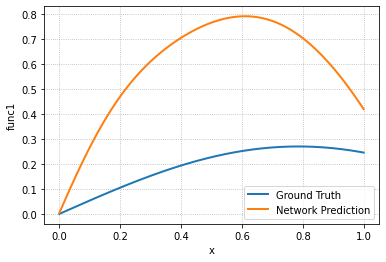

In [19]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, func1_test, label="Ground Truth",lw=2)
plt.plot(x_test, func1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("func1")
plt.legend()

In [20]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2_test_pred - func2_test)**2)/torch.mean(func2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  27.19869315624237 %


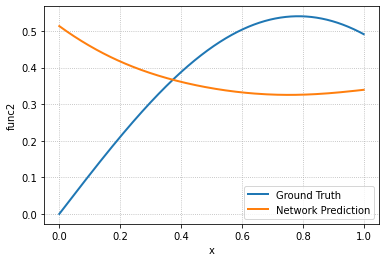

In [21]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, func2_test, label="Ground Truth",lw=2)
plt.plot(x_test, func2_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("func2")
plt.legend()

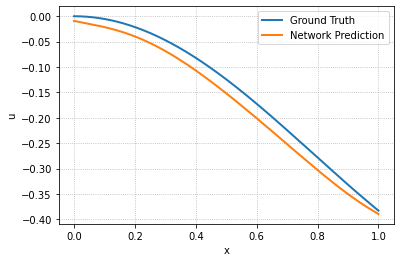

In [22]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, h_test, label="Ground Truth",lw=2)
plt.plot(x_test, h_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [23]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h_test_pred - h_test)**2)/torch.mean(h_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  1.3925932347774506 %


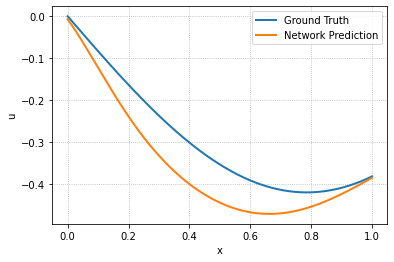

In [24]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, e1_test, label="Ground Truth",lw=2)
plt.plot(x_test, e1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [25]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e1_test_pred - e1_test)**2)/torch.mean(e1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  4.259094595909119 %


In [26]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e2_test_pred - e2_test)**2)/torch.mean(e2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  2.632266655564308 %


In [27]:
# for ploting

In [28]:
model = my_network
x_test = pi*torch.rand(100000).reshape(-1,1)
t_test = torch.rand(100000).reshape(-1,1)
test = torch.cat([x_test, t_test],1)
u_test = exact_solution_u(x_test,t_test).reshape(-1,1)
p_test = exact_solution_p(x_test,t_test).reshape(-1,1)
u_test_pred = my_network(test)
u_pred = u_test_pred[:, 0].reshape(-1,1)

u_pred1 = u_test_pred[:, 1].reshape(-1,1)


relative_error = torch.abs(u_pred- u_test)

relative_error1 = torch.abs(u_pred1- p_test)
u_pred = u_pred.detach().numpy()
x_test = x_test.detach().numpy()
t_test = t_test.detach().numpy()
p_pred = u_pred1.detach().numpy()
relative_error = relative_error.detach().numpy()
relative_error1 = relative_error1.detach().numpy()

NameError: name 'exact_solution_u' is not defined

In [ ]:

x_test = x_test.reshape(-1,)
t_test = t_test.reshape(-1,)

u_pred = u_pred.reshape(-1,)
p_pred = p_pred.reshape(-1,)

In [ ]:

plt.rcParams['figure.figsize'] = [10, 4]


CS = plt.tricontourf(x_test, t_test, u_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#plt.savefig('timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
CS = plt.tricontourf(x_test, t_test, p_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('timo_p.png', dpi = 300, bbox_inches = "tight")

In [ ]:

x_test = x_test.reshape(-1, )
t_test = t_test.reshape(-1, )
relative_error = relative_error.reshape(-1,)




CS = plt.tricontourf(x_test, t_test, relative_error, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
relative_error1 = relative_error1.reshape(-1,)

CS = plt.tricontourf(x_test, t_test, relative_error1, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_p.png', dpi = 300, bbox_inches = "tight")